## 한국조폐공사_카드_가맹점기본정보

https://www.data.go.kr/data/15108279/openapi.do

지역사랑상품권 운영대행사들로부터 수집한 카드 가맹점에 대한 가맹점명, 대표전화번호, 주소, 위경도, 사업자 상태, 표준산업분류코드 등을 제공한다.

아래는 데이터 사용시 참고바랍니다:
1) 제공기관코드:
코나아이: I0000001
한국간편결제진흥원: I0000002
신한카드: I0000003
한국조폐공사: I0000004
KT: I0000005
농협은행: I0000006
광주은행: I0000007
대구은행: I0000008
ITS&G: I0000009
NICE 정보통신: I0000010
KIS 정보통신: I0000011
인조이웍스: I0000012
부산은행: I0000014

2) 사용처지역코드(5자리):
- 행정안전부에서 제공하는 법정동코드(지역코드 10자리) 중, 앞 5자리(시도코드 2자리 + 시군구코드 3자리)를 사용하고 있습니다.
- 코드 정보는 참고문서를 확인바랍니다.

3) 읍면동코드(8자리):
- 행정안전부에서 제공하는 법정동코드(지역코드 10자리) 중, 앞 8자리(시도코드 2자리 + 시군구코드 3자리 + 읍면동코드 3자리)를 사용하고 있습니다.
- 법정동코드는 행정안전부_행정표준코드_법정동코드 API(https://www.data.go.kr/data/15077871/openapi.do)를 활용하여 조회할 수 있습니다.

In [25]:
import requests
import logging
import ssl
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.ssl_ import create_urllib3_context

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# SSL 컨텍스트 생성
ctx = create_urllib3_context()
ctx.set_ciphers('DEFAULT@SECLEVEL=1')

# 커스텀 어댑터 클래스 정의
class CustomAdapter(HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        kwargs['ssl_context'] = ctx
        return super(CustomAdapter, self).init_poolmanager(*args, **kwargs)

# 세션 생성 및 어댑터 설정
session = requests.Session()
session.mount('https://', CustomAdapter())

# API 엔드포인트 URL
url = "https://apis.data.go.kr/B190001/cardFranchisesV3/cardV3"

# 인증키
api_key = "1gpaK4ticgtOqnE5t7cIOQtKz7kP4Lu3HbyACKUWni5Ag/yj9cl9uueNXK20lnGIEqPnYSMiSOmR61YL9xS40g=="

# 요청 파라미터
params = {
    "serviceKey": api_key,
    "page": "1",
    "perPage": "3000"
}

# 요청 헤더
headers = {
    "accept": "*/*",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

try:
    # GET 요청 보내기
    response = session.get(url, params=params, headers=headers, timeout=30)
    
    # 응답 상태 확인
    response.raise_for_status()
    
    # JSON 형식으로 데이터 파싱
    data = response.json()
    
    # 데이터 추출 및 DataFrame 생성
    items = data.get('data', [])
    if items:
        df = pd.DataFrame(items)
        logging.info("DataFrame 생성 완료")
        logging.info(f"DataFrame shape: {df.shape}")
        logging.info("\nDataFrame 첫 5행:")
        logging.info(df.head().to_string())
    else:
        logging.warning("추출된 데이터 항목이 없습니다.")
        logging.info("응답 데이터:")
        logging.info(json.dumps(data, indent=2, ensure_ascii=False))

except requests.exceptions.RequestException as e:
    logging.error(f"요청 중 오류 발생: {e}")
    if hasattr(e, 'response') and e.response is not None:
        logging.error(f"응답 상태 코드: {e.response.status_code}")
        logging.error(f"응답 내용: {e.response.text}")
    else:
        logging.error("응답 객체가 없습니다.")
except ValueError as e:
    logging.error(f"JSON 디코딩 오류: {e}")
    logging.error(f"응답 내용: {response.text}")
except Exception as e:
    logging.error(f"예상치 못한 오류 발생: {e}")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): apis.data.go.kr:443


DEBUG:urllib3.connectionpool:https://apis.data.go.kr:443 "GET /B190001/cardFranchisesV3/cardV3?serviceKey=1gpaK4ticgtOqnE5t7cIOQtKz7kP4Lu3HbyACKUWni5Ag%2Fyj9cl9uueNXK20lnGIEqPnYSMiSOmR61YL9xS40g%3D%3D&page=1&perPage=3000 HTTP/1.1" 200 None
INFO:root:DataFrame 생성 완료
INFO:root:DataFrame shape: (3000, 26)
INFO:root:
DataFrame 첫 5행:
INFO:root:                           alt_text bk_awa_perf_hd_yn        brno bzmn_stts bzmn_stts_nm  crtr_ymd    emd_cd emd_nm                             frcs_addr frcs_dtl_addr   frcs_nm frcs_reg_se frcs_reg_se_nm frcs_rprs_telno frcs_zip ksic_cd       ksic_cd_nm        lat         lot onl_dlvy_ent_use_yn pos_use_yn ppr_frcs_aply_yn pvsn_inst_cd qr_reg_conm te_gds_hd_yn usage_rgn_cd
0  d56f54fa6c3efdd25edb64afb35bde49                 N  4021284102        01        계속사업자  20221031  52111142  효자동3가                     전북 전주시 완산구 용호로 97       (효자동3가)  송월타올.판촉물          01             신규            None    55060     474      소매업; 자동차 제외  35.811953  127.096847     

## gpt가 이렇게 알려주기는 하는데 정확한 key값의 정보는 문의 해노호은 상태임
crtr_ymd: 생성 일자 (Creation Date)         
alt_text: 대체 텍스트 (Alternative Text)      
frcs_reg_se: 가맹점 등록 구분 (Franchise Registration Type)        
frcs_reg_se_nm: 가맹점 등록 구분명 (Franchise Registration Type Name)      
ksic_cd_nm: 한국표준산업분류 코드명 (Korean Standard Industrial Classification Code Name)         
qr_reg_conm: QR 등록 회사명 (QR Registration Company Name)         
te_gds_hd_yn: 세금계산서 발행 여부 (Tax Invoice Issuance Y/N)          
bk_awa_perf_hd_yn: 현금영수증 발행 여부 (Cash Receipt Issuance Y/N)             
onl_dlvy_ent_use_yn: 온라인 배달 엔트리 사용 여부 (Online Delivery Entry Usage Y/N)                  
pos_use_yn: POS 사용 여부 (Point of Sale System Usage Y/N)                           
ppr_frcs_aply_yn: 페이퍼 가맹점 적용 여부 (Paper Franchise Application Y/N)             
bzmn_stts: 사업자 상태 (Business Status)                
bzmn_stts_nm: 사업자 상태명 (Business Status Name)              
brno: 사업자 등록 번호 (Business Registration Number)            
lat: 위도 (Latitude)            
lot: 경도 (Longitude)                 
ksic_cd: 한국표준산업분류 코드 (Korean Standard Industrial Classification Code)       

In [26]:
df.tail()

,alt_text,bk_awa_perf_hd_yn,brno,bzmn_stts,bzmn_stts_nm,crtr_ymd,emd_cd,emd_nm,frcs_addr,frcs_dtl_addr,...,ksic_cd_nm,lat,lot,onl_dlvy_ent_use_yn,pos_use_yn,ppr_frcs_aply_yn,pvsn_inst_cd,qr_reg_conm,te_gds_hd_yn,usage_rgn_cd
2995,7b9331773bcd9e96e3db38e69afced83,None,3080796210,01,계속사업자,20230712,44230340,상월면,충청남도 논산시 상월면 백일헌로,999,...,음식점 및 주점업,36.291010,127.141640,N,N,None,I0000004,신동회관,None,44230
2996,8c4edc0ca5b3e849e9f3aa76f5c7141e,N,2030766667,03,폐업자,20240329,46230108,광영동,전라남도 광양시 신광길 29,.,...,소매업; 자동차 제외,34.961714,127.721183,N,N,None,I0000004,None,N,46230
2997,9c6c8aef70df66dd76df626a42b28045,N,8270101357,01,계속사업자,20231017,44770410,서면,충청남도 서천군 서면 월하성길,35-3,...,음식점 및 주점업,36.140027,126.561406,N,Y,None,I0000004,None,N,44770
2998,f3c3341b9b4036307b2602b7f697c4f1,N,3832101587,01,계속사업자,20231017,51130117,반곡동,강원특별자치도 원주시 양지뜰4길 25,탕땀,...,음식점 및 주점업,37.326736,127.983786,N,Y,None,I0000004,None,Y,51130
2999,8a0714054c8d521eb5cee83cb5a95367,N,7029700182,03,폐업자,20231123,41133101,성남동,경기도 성남시 중원구 성남시 중원구 원터로 103-1 2층,토트영어학원,...,교육 서비스업,37.435975,127.142406,N,N,None,I0000004,None,N,41130


## 한국조폐공사_지역사랑상품권_결제정보

![스크린샷 2024-08-19 오후 1.02.40.png](<attachment:스크린샷 2024-08-19 오후 1.02.40.png>)


![스크린샷 2024-08-19 오후 1.03.16.png](<attachment:스크린샷 2024-08-19 오후 1.03.16.png>)
### 서비스 안됨 (200으로 잘 통신했지만 서비스 에러)
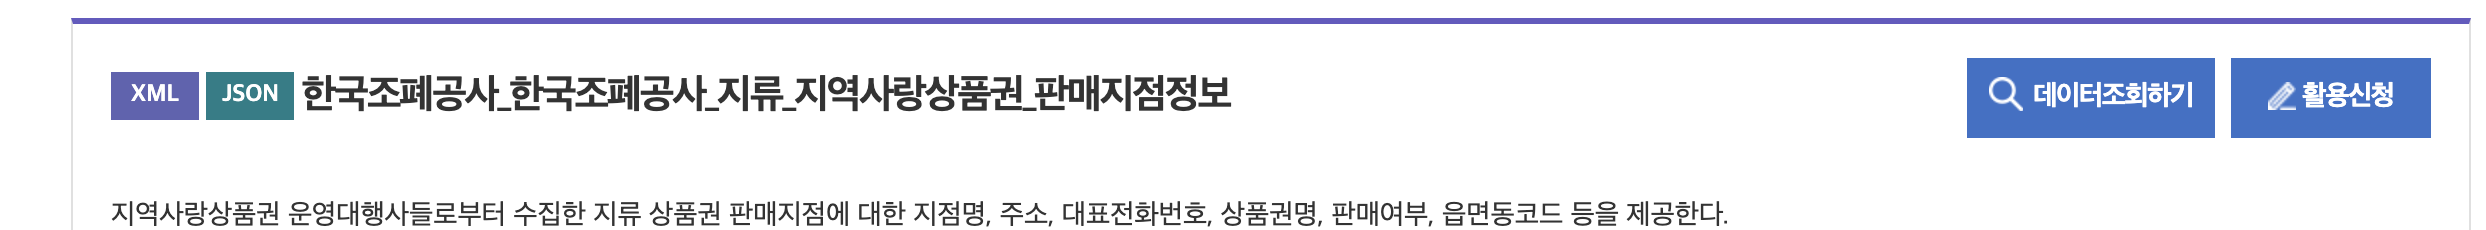
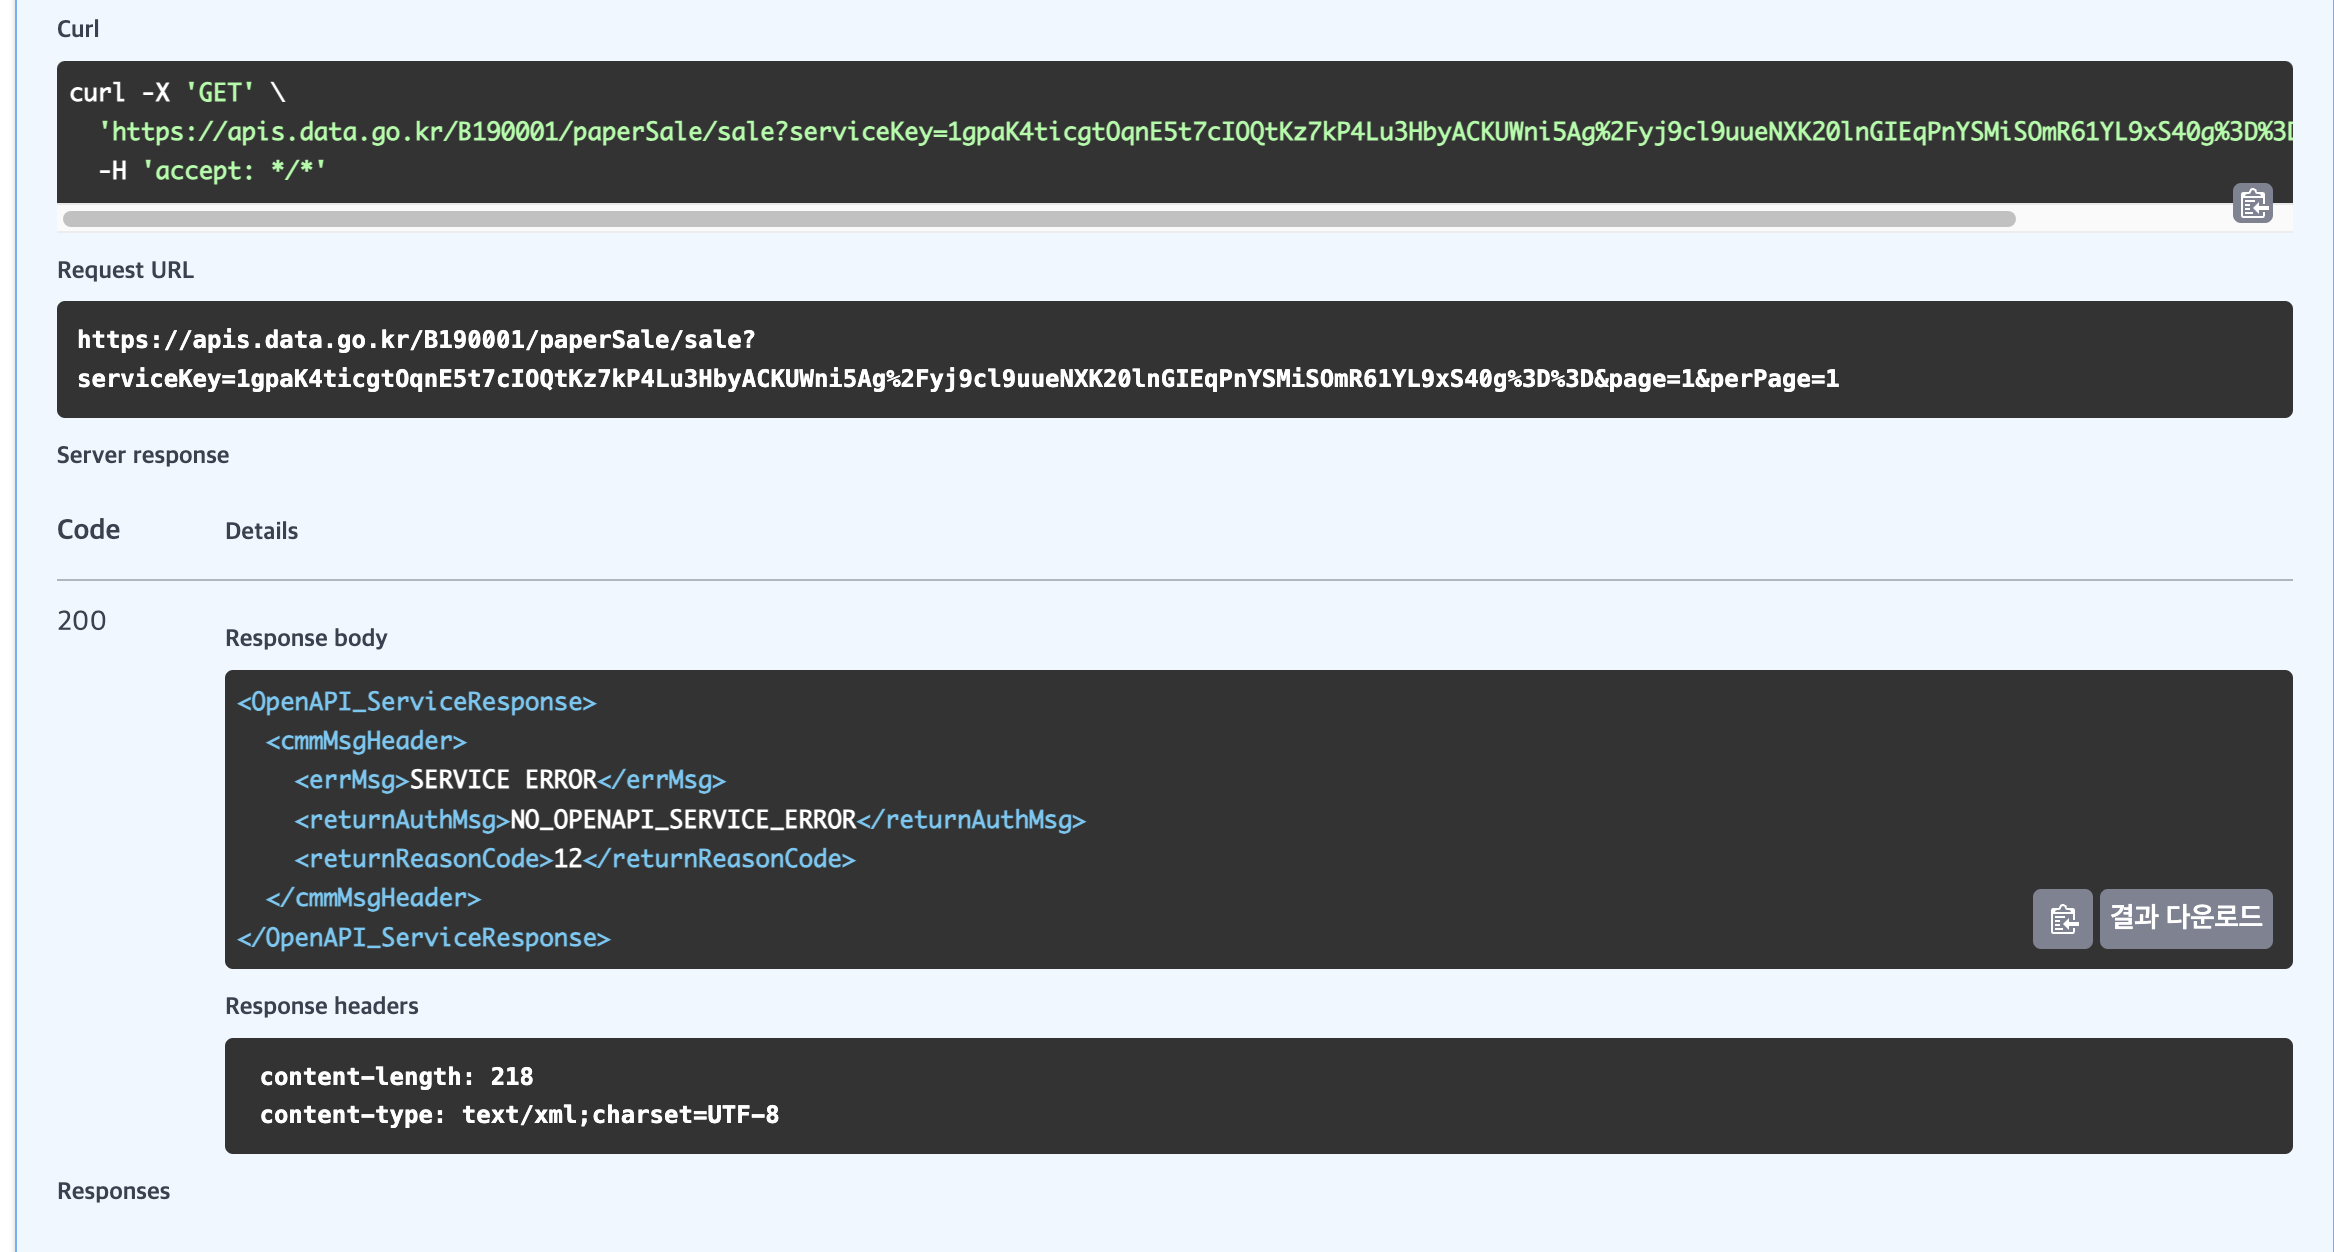

한국조폐공사_한국조폐공사_지류_지역사랑상품권_환전지점정보
 1.0.0 
[ Base URL: apis.data.go.kr/B190001/paperExchange ]

## 이것도 서비스 안됨

## 한국조폐공사_지역사랑상품권_운영정보
-> 불러오기는 했는데 json 파일의 각각의 데이터가 뭐를 뜻하는지 모르겠음

In [30]:
import requests
import logging
import ssl
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.ssl_ import create_urllib3_context

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# SSL 컨텍스트 생성
ctx = create_urllib3_context()
ctx.set_ciphers('DEFAULT@SECLEVEL=1')

# 커스텀 어댑터 클래스 정의
class CustomAdapter(HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        kwargs['ssl_context'] = ctx
        return super(CustomAdapter, self).init_poolmanager(*args, **kwargs)

# 세션 생성 및 어댑터 설정
session = requests.Session()
session.mount('https://', CustomAdapter())

# API 엔드포인트 URL
url = "https://apis.data.go.kr/B190001/localGiftsOperateV2/operationsV2"

# 인증키
api_key = "1gpaK4ticgtOqnE5t7cIOQtKz7kP4Lu3HbyACKUWni5Ag/yj9cl9uueNXK20lnGIEqPnYSMiSOmR61YL9xS40g=="

# 요청 파라미터
params = {
    "serviceKey": api_key,
    "page": "1",
    "perPage": "3000"
}

# 요청 헤더
headers = {
    "accept": "*/*",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

try:
    # GET 요청 보내기
    response = session.get(url, params=params, headers=headers, timeout=30)
    
    # 응답 상태 확인
    response.raise_for_status()
    
    # JSON 형식으로 데이터 파싱
    data = response.json()
    
    # 데이터 추출 및 DataFrame 생성
    items = data.get('data', [])
    if items:
        df_info = pd.DataFrame(items)
        logging.info("DataFrame 생성 완료")
        logging.info(f"DataFrame shape: {df_info.shape}")
        logging.info("\nDataFrame 첫 5행:")
        logging.info(df_info.head().to_string())
    else:
        logging.warning("추출된 데이터 항목이 없습니다.")
        logging.info("응답 데이터:")
        logging.info(json.dumps(data, indent=2, ensure_ascii=False))

except requests.exceptions.RequestException as e:
    logging.error(f"요청 중 오류 발생: {e}")
    if hasattr(e, 'response') and e.response is not None:
        logging.error(f"응답 상태 코드: {e.response.status_code}")
        logging.error(f"응답 내용: {e.response.text}")
    else:
        logging.error("응답 객체가 없습니다.")
except ValueError as e:
    logging.error(f"JSON 디코딩 오류: {e}")
    logging.error(f"응답 내용: {response.text}")
except Exception as e:
    logging.error(f"예상치 못한 오류 발생: {e}")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): apis.data.go.kr:443
DEBUG:urllib3.connectionpool:https://apis.data.go.kr:443 "GET /B190001/localGiftsOperateV2/operationsV2?serviceKey=1gpaK4ticgtOqnE5t7cIOQtKz7kP4Lu3HbyACKUWni5Ag%2Fyj9cl9uueNXK20lnGIEqPnYSMiSOmR61YL9xS40g%3D%3D&page=1&perPage=3000 HTTP/1.1" 200 None
INFO:root:DataFrame 생성 완료
INFO:root:DataFrame shape: (3000, 8)
INFO:root:
DataFrame 첫 5행:
INFO:root:   card_pblcn_qty crtr_ym  mbl_chg_amt  mbl_joiner_cnt  ppr_ntsl_amt  ppr_rtrvl_amt pvsn_inst_cd usage_rgn_cd
0               0  201006            0               0      67980000       37865000     I0000009        41820
1               0  201007            0               0      31850000       26835000     I0000009        41820
2               0  201008            0               0      38420000       34845000     I0000009        41820
3               0  201009            0               0      96260000       74995000     I0000009        41820
4               0

In [29]:
df_info.tail()

,card_pblcn_qty,crtr_ym,mbl_chg_amt,mbl_joiner_cnt,ppr_ntsl_amt,ppr_rtrvl_amt,pvsn_inst_cd,usage_rgn_cd
2995,123,202103,8415000,44,926733000,2713387000,I0000004,48740
2996,0,202103,3122520000,0,0,0,I0000002,11680
2997,403,202103,338265000,1669,403243500,2228390000,I0000004,47210
2998,151,202103,5280000,59,994407000,1322275000,I0000004,52750
2999,0,202103,1679795000,959835,0,0,I0000005,47850
